In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
import plotly.express as px
from collections import Counter
from plotly import io
import plotly

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"

In [4]:
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY"}

## Directed Weighted Network Creation

In [5]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 12
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[120 rows x 2 columns]
Raw_Data/1604.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    521    974
2         AGARTALA        SILCHAR      2      0
3    AGATTI ISLAND          KOCHI   1623      0
4             AGRA          DELHI      0     54
5             AGRA      KHAJURAHO    189      0
..             ...            ...    ...    ...
313       VADODARA      HYDERABAD    499      0
314       VADODARA        KOLKATA   1021      0
315       VADODARA     

In [6]:
print(lbls2)
print(lbls)

['2015-05-01', '2016-05-01', '2017-05-01', '2018-05-01', '2019-05-01', '2020-05-01']
['1505', '1605', '1705', '1805', '1905', '2005']


In [7]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [8]:
print(lbls1)

['May15', 'May16', 'May17', 'May18', 'May19', 'May20']


In [9]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [10]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

In [11]:
colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)


    plt.title("Airport Network Of India from "+ lbls2[i] + " for "+ str(monthstogether)+ " months")
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


0
1
2
3
4
5


## Network Visualization

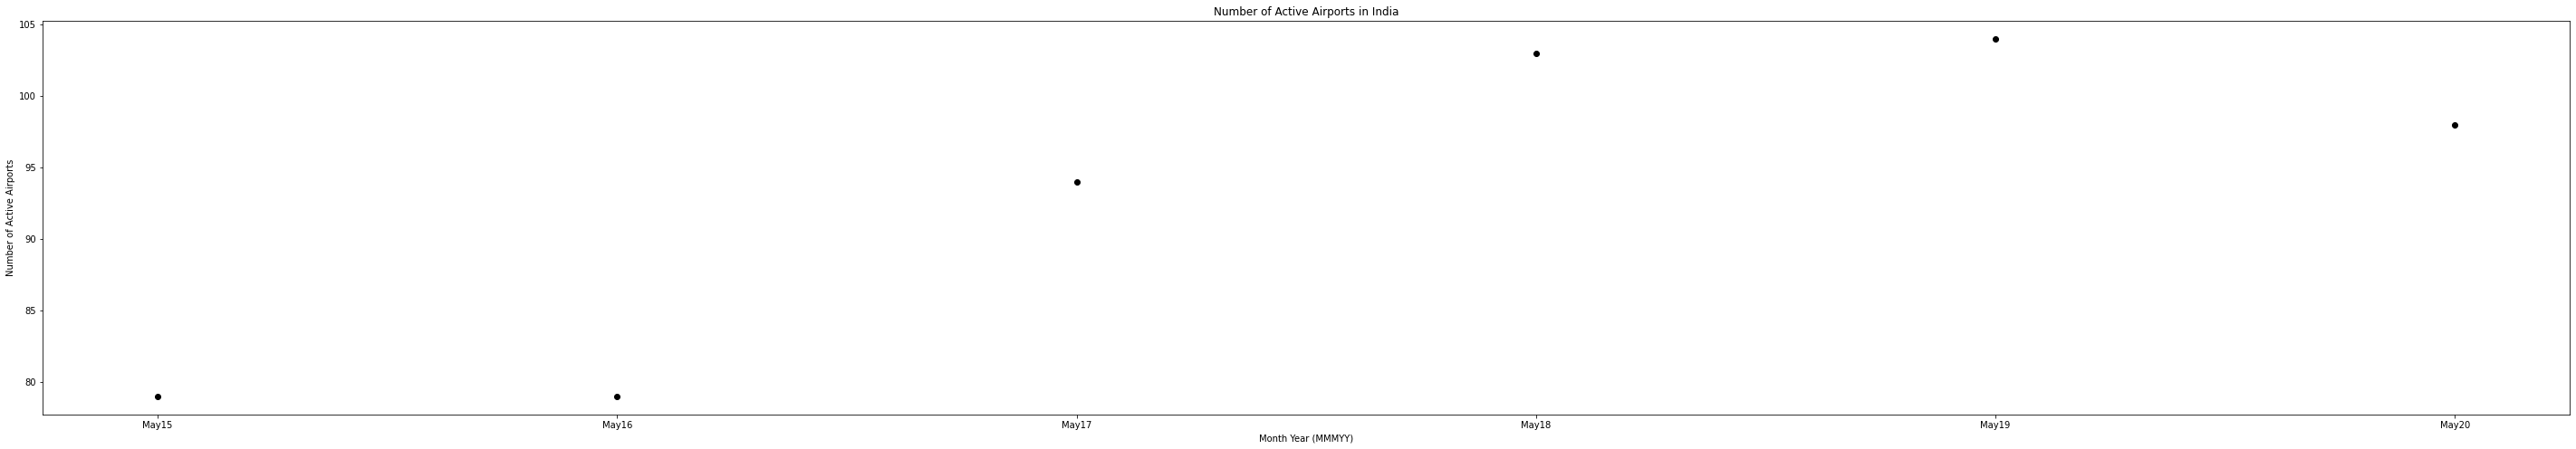

In [12]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
# plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

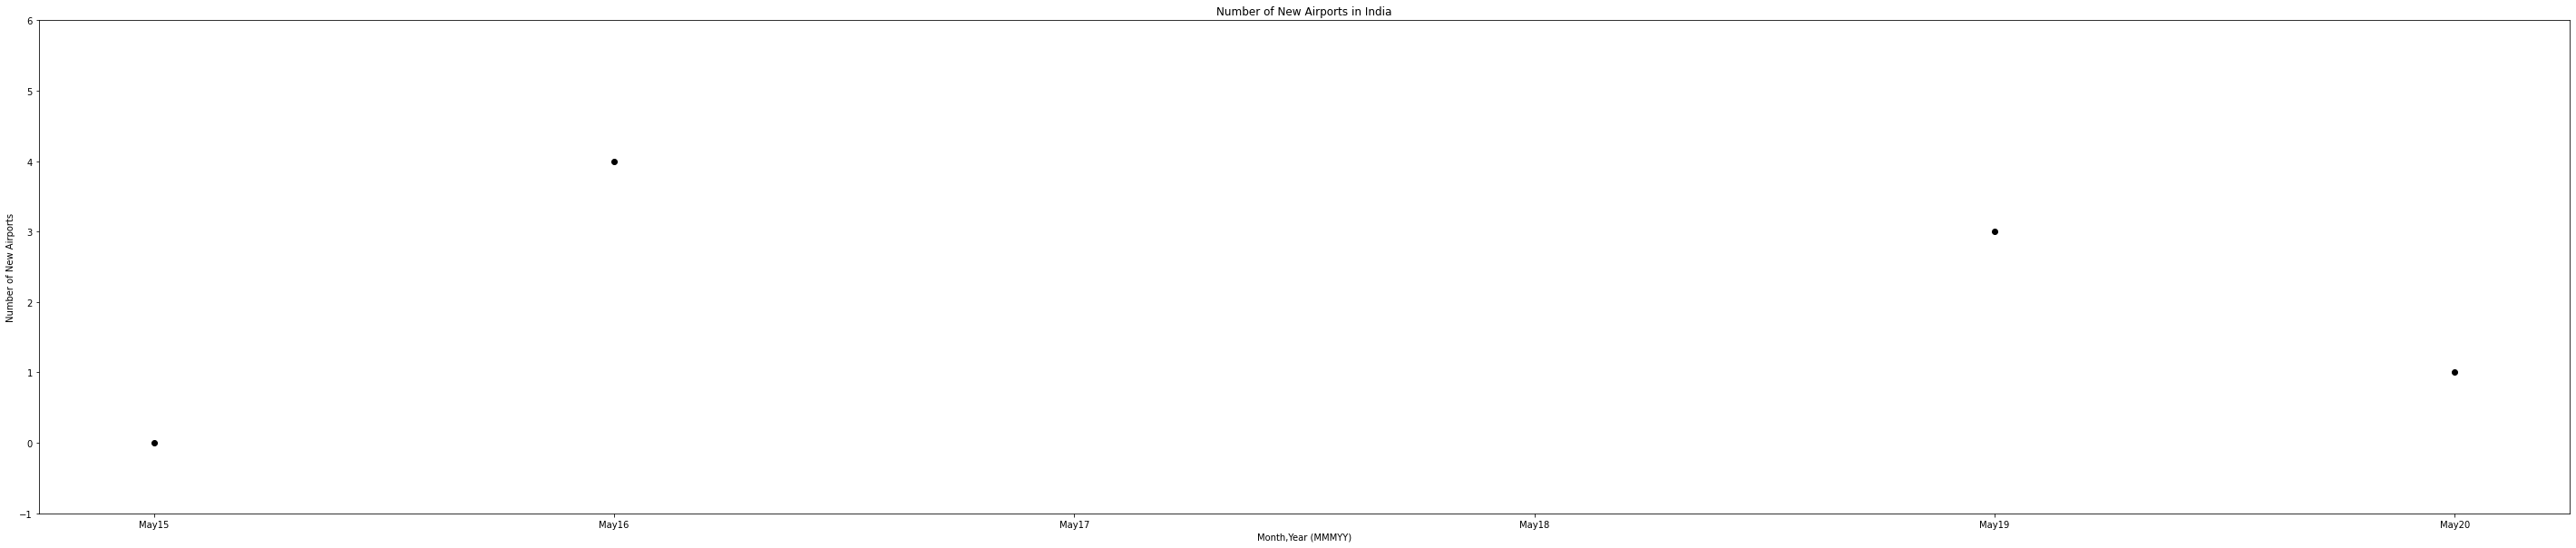

In [13]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0

plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
# plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()


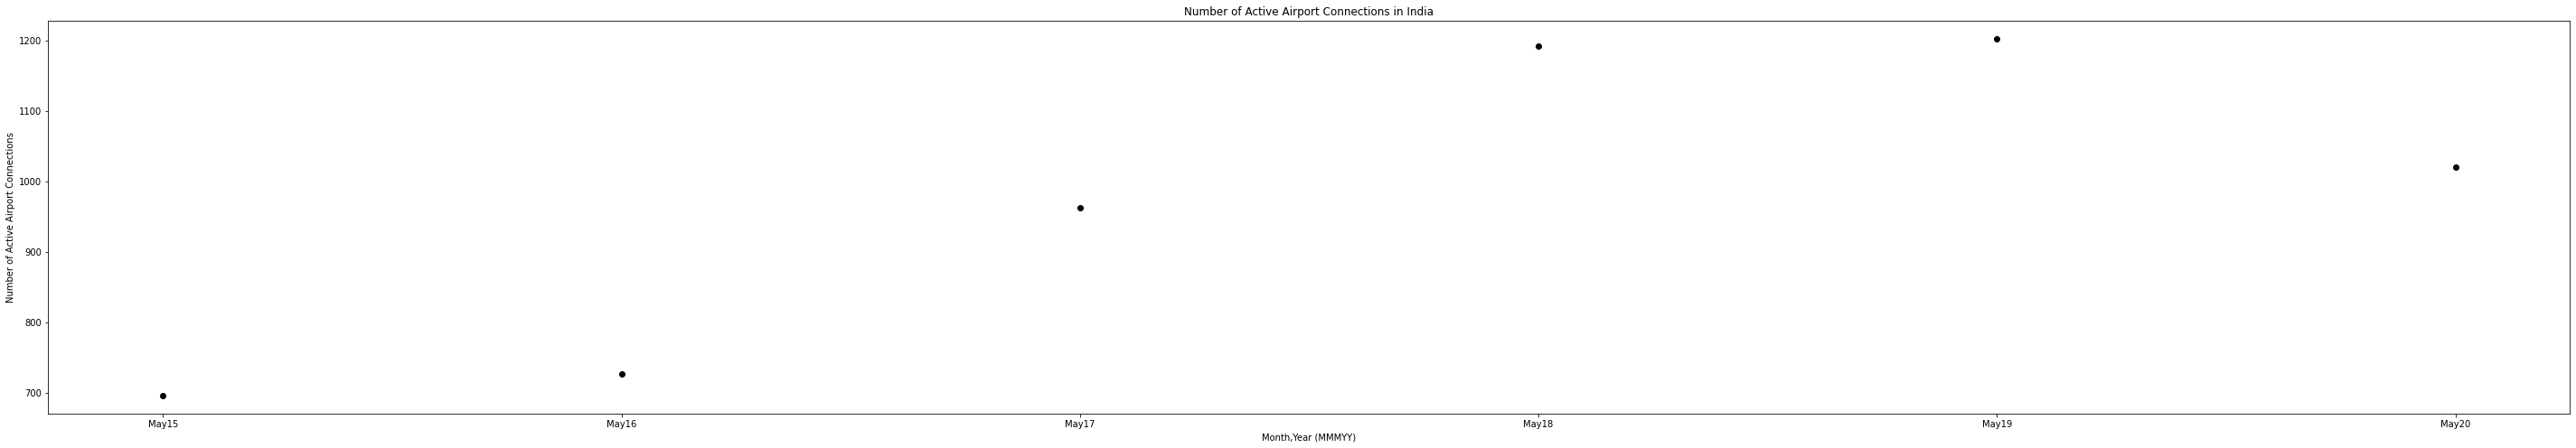

In [14]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

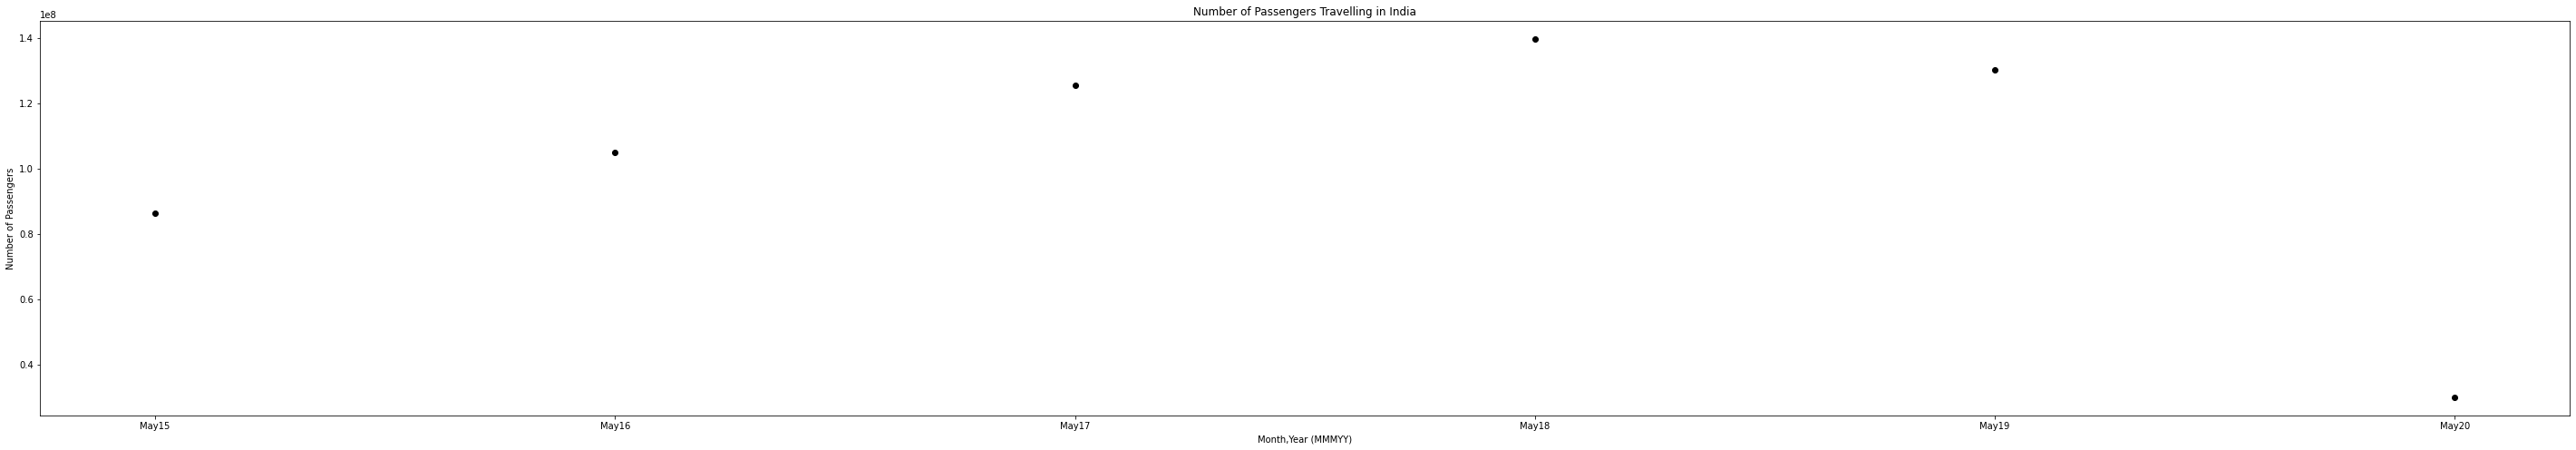

In [15]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [16]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.31595900671384003
MUMBAI -> 0.2171474915187085
BENGALURU -> 0.18817602245608062
KOLKATA -> 0.13774763337994225
CHENNAI -> 0.07777359650670164
HYDERABAD -> 0.04572332608854911
GUWAHATI -> 0.024839310252059262
KHAJURAHO -> 0.01282051282051282
KOCHI -> 0.008990691407539267
VARANASI -> 0.00852837638551924
May16
Top 10 nodes
DELHI -> 0.3952605957211645
MUMBAI -> 0.16680934472995354
BENGALURU -> 0.10131819298755305
KOLKATA -> 0.1010989275709849
HYDERABAD -> 0.0803580435059251
CHENNAI -> 0.07925136730595982
GUWAHATI -> 0.06567961120908172
KOCHI -> 0.01727787373391769
KHAJURAHO -> 0.01282051282051282
VARANASI -> 0.007818047753112688
May17
Top 10 nodes
DELHI -> 0.3446186870334447
MUMBAI -> 0.2324484558107723
CHENNAI -> 0.10514313181917852
KOLKATA -> 0.07587266456222412
HYDERABAD -> 0.07272655808072541
BENGALURU -> 0.06366847899368397
AHMEDABAD -> 0.040395166454485
GUWAHATI -> 0.032781669714982496
KOCHI -> 0.02354734896810633
JAIPUR -> 0.023184877785880183
May18
Top

{'2015-05-01': -0.5021988559016461, '2016-05-01': -0.4678915076236909, '2017-05-01': -0.4743636365988953, '2018-05-01': -0.45390947487221844, '2019-05-01': -0.4027398829152757, '2020-05-01': -0.4917626970742977}


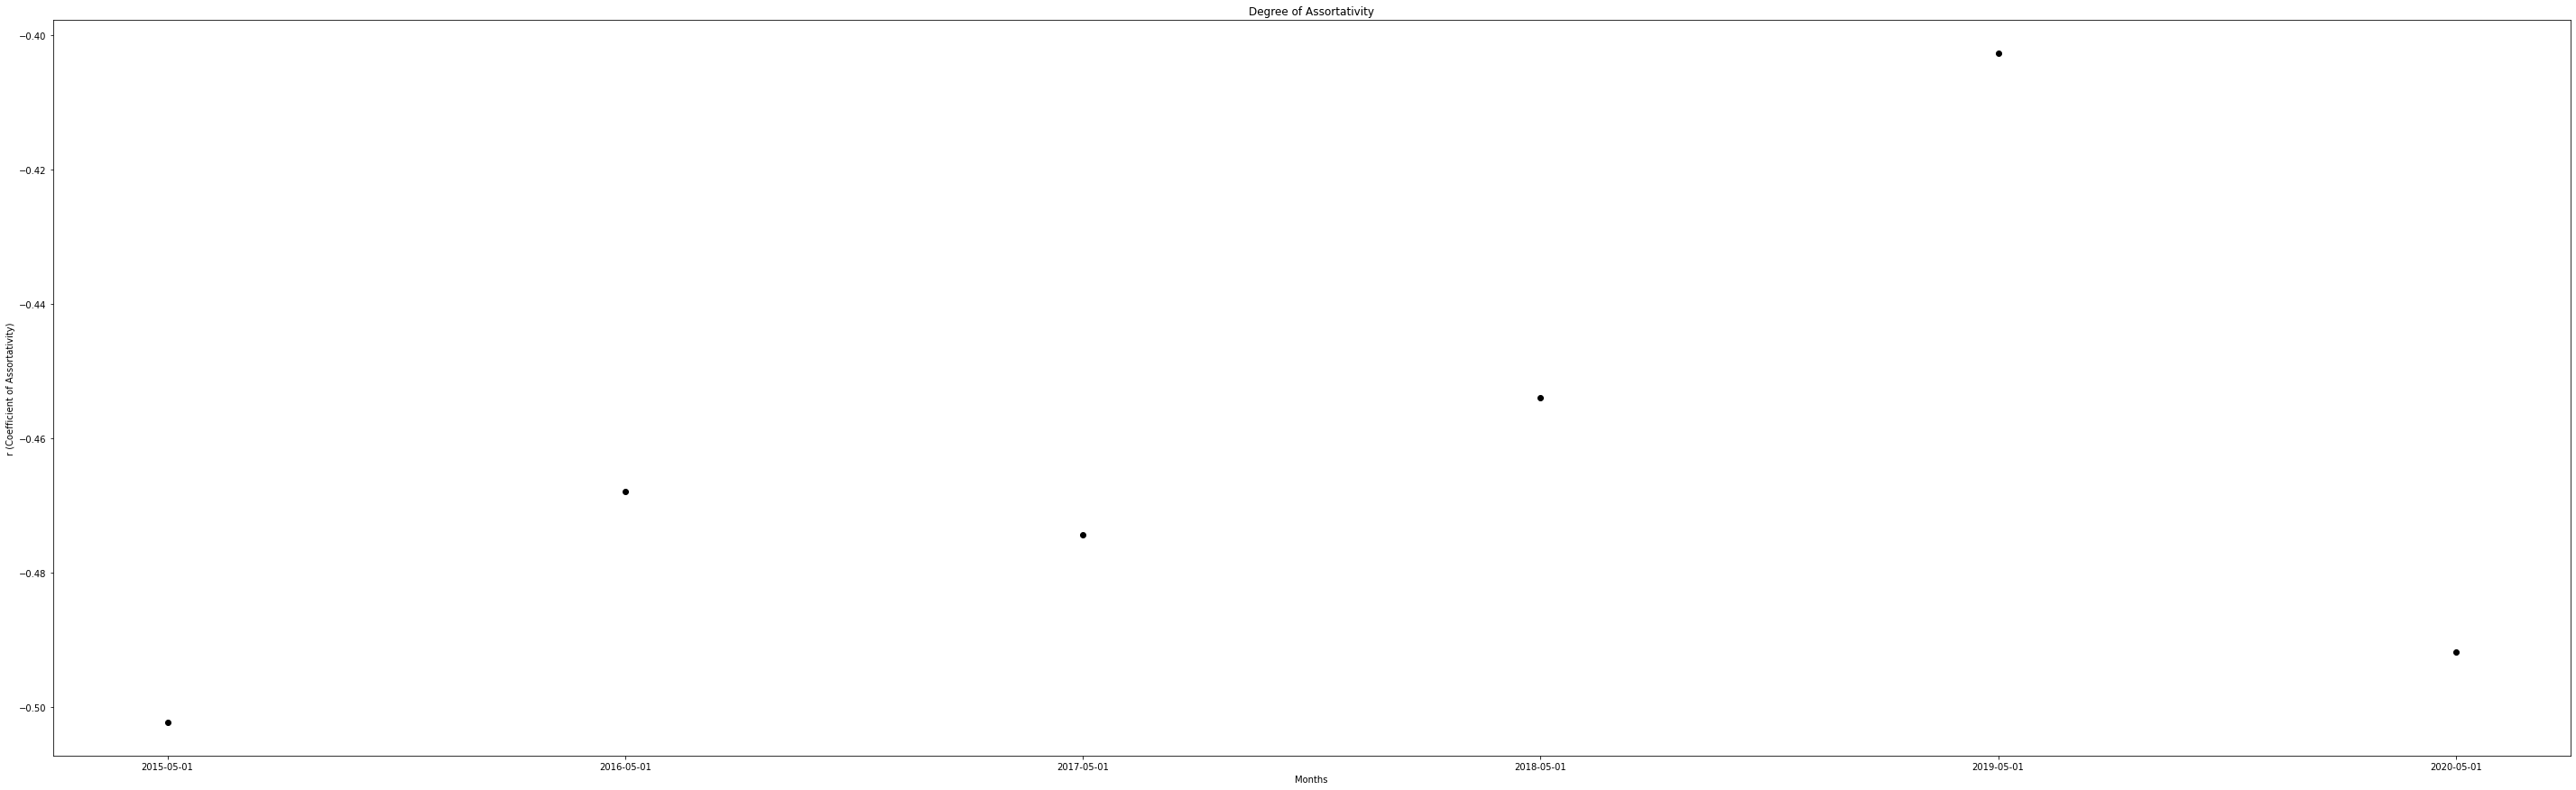

In [17]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls2[i]] = pearson
    except:
        print(lbls1[i])
print(assortativity)

plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()

Degree Distribution

May15


Average clustering coefficient for May15 is 0.6890849805822922
May16


Average clustering coefficient for May16 is 0.637700698726176
May17


Average clustering coefficient for May17 is 0.6432784010191432
May18


Average clustering coefficient for May18 is 0.7199740251163755
May19


Average clustering coefficient for May19 is 0.6720482010401418
May20


Average clustering coefficient for May20 is 0.7222333014649214


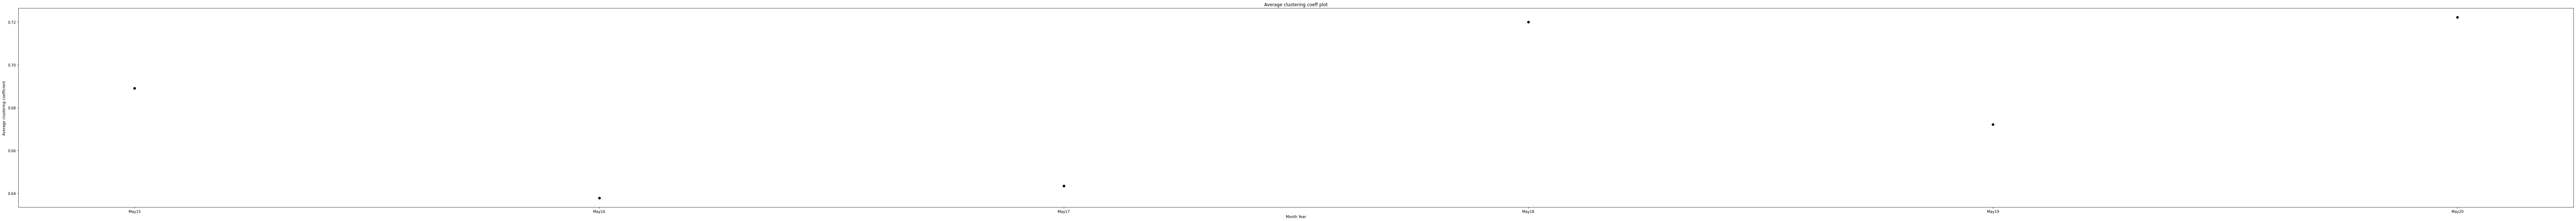

2538

In [18]:
avg_clust_coeff_list = []
def haha(gi):
    print(lbls1[gi])
    G = graphs[gi]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[gi])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[gi])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[gi])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[gi], "is", avg_clust_coeff)
    
    
for gi in range(len(graphs)):
    plt.ioff()
    haha(gi)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
# plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [19]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 696, 2: 4449, 3: 998, 4: 19}
Characteristic Path length for 1505  is  2.055176890619929


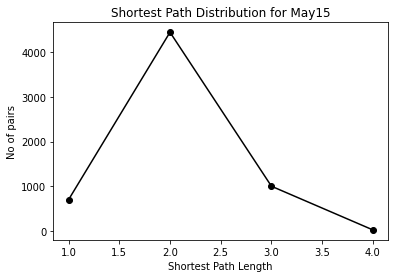



{1: 727, 2: 4389, 3: 1029, 4: 17}
Characteristic Path length for 1605  is  2.054527750730282


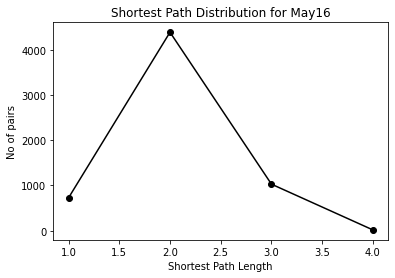



{1: 963, 2: 6264, 3: 1515}
Characteristic Path length for 1705  is  2.063143445435827


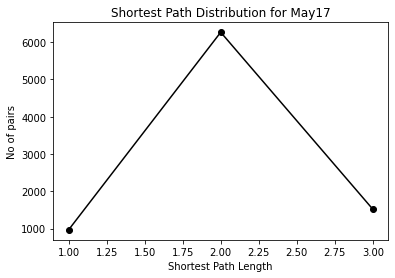



{1: 1192, 2: 7495, 3: 1816, 4: 3}
Characteristic Path length for 1805  is  2.059965733866362


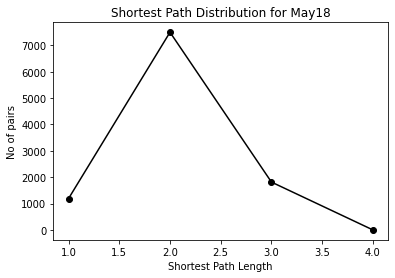



{1: 1203, 2: 7361, 3: 2106, 4: 42}
Characteristic Path length for 1905  is  2.092139656460045


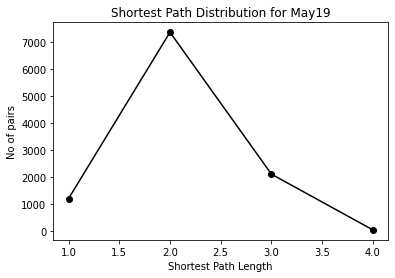



{1: 1020, 2: 6902, 3: 1502, 4: 81, 5: 1}
Characteristic Path length for 2005  is  2.0680622764569745


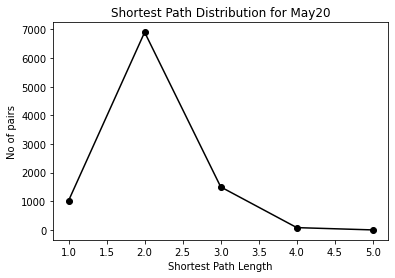

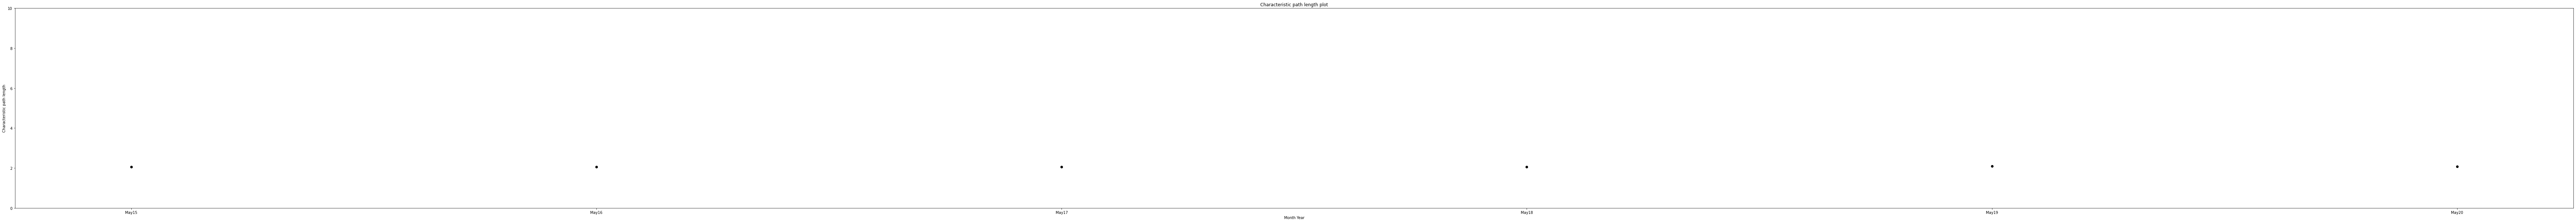

2494

In [20]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



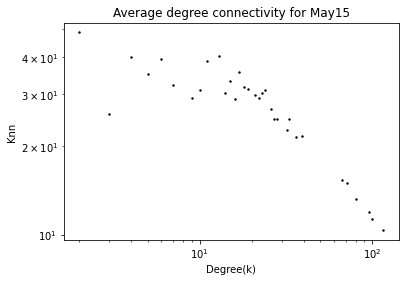

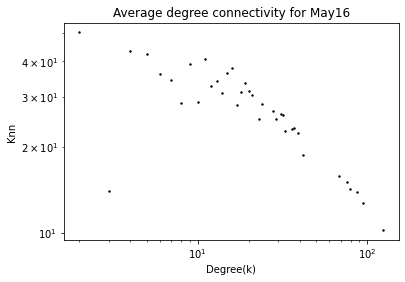

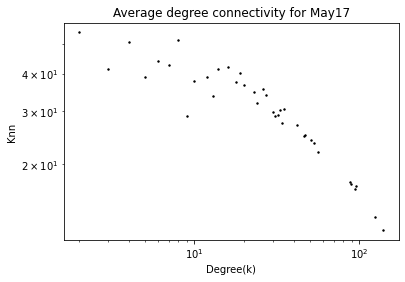

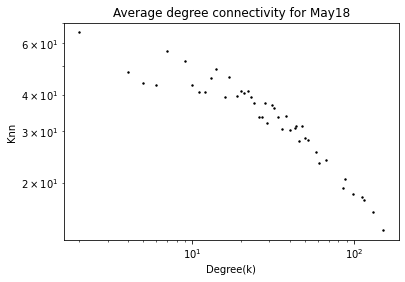

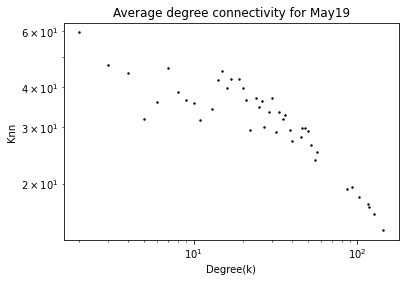

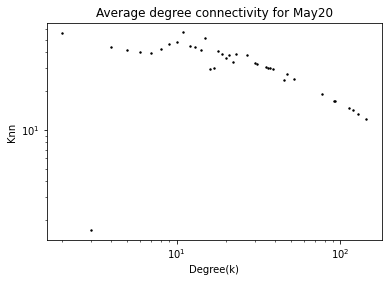

In [21]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    #plt.grid(True, which="both")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()